In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
import math
import pickle

In [5]:
df = pd.read_csv('btcDataset.csv')

In [6]:
df.head()

,Close,Timestamp,High,Low,Open,Volume_(BTC),Volume_(Currency),Weighted_Price
0,225.0,1424373000,0.33,225.0,0.33,0.004444,0.999999,225.0
1,225.0,1424373300,225.00,225.0,225.00,0.000000,0.000000,225.0
2,225.0,1424373600,225.00,225.0,225.00,0.000000,0.000000,225.0
3,225.0,1424373900,225.00,225.0,225.00,0.000000,0.000000,225.0
4,225.0,1424374200,225.00,225.0,225.00,0.000000,0.000000,225.0


In [7]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date

In [8]:
df['Date'].head()

0    2015-02-19
1    2015-02-19
2    2015-02-19
3    2015-02-19
4    2015-02-19
Name: Date, dtype: object

In [9]:
group = df.groupby('Date')

In [10]:
group.head()

,Close,Timestamp,High,Low,Open,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
0,225.000000,1424373000,0.330000,225.000000,0.330000,0.004444,0.999999,225.000000,2015-02-19
1,225.000000,1424373300,225.000000,225.000000,225.000000,0.000000,0.000000,225.000000,2015-02-19
2,225.000000,1424373600,225.000000,225.000000,225.000000,0.000000,0.000000,225.000000,2015-02-19
3,225.000000,1424373900,225.000000,225.000000,225.000000,0.000000,0.000000,225.000000,2015-02-19
4,225.000000,1424374200,225.000000,225.000000,225.000000,0.000000,0.000000,225.000000,2015-02-19
58,244.000000,1424390400,244.000000,244.000000,244.000000,0.000000,0.000000,244.000000,2015-02-20
59,244.000000,1424390700,244.000000,244.000000,244.000000,0.000000,0.000000,244.000000,2015-02-20
60,244.000000,1424391000,244.000000,244.000000,244.000000,0.000000,0.000000,244.000000,2015-02-20
61,244.000000,1424391300,244.000000,244.000000,244.000000,0.000000,0.000000,244.000000,2015-02-20
62,244.000000,1424391600,244.000000,244.000000,244.000000,0.000000,0.000000,244.000000,2015-02-20


In [11]:
group['Weighted_Price'].mean().head()

Date
2015-02-19    239.036070
2015-02-20    241.513338
2015-02-21    241.404514
2015-02-22    243.707271
2015-02-23    235.000082
Name: Weighted_Price, dtype: float64

In [12]:
Real_Price = group['Weighted_Price'].mean()


In [13]:
prediction_days = math.ceil(len(Real_Price)*0.27)
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [14]:
len(df_train)

990

In [15]:
len(df_test)

367

In [16]:
type(df_test)

pandas.core.series.Series

In [17]:
df_test

Date
2017-11-05     7455.721084
2017-11-06     7222.552962
2017-11-07     7084.535841
2017-11-08     7343.197807
2017-11-09     7210.171331
2017-11-10     6910.643481
2017-11-11     6496.451574
2017-11-12     6057.391216
2017-11-13     6280.905497
2017-11-14     6526.511534
2017-11-15     6993.465737
2017-11-16     7450.949263
2017-11-17     7827.397033
2017-11-18     7683.135526
2017-11-19     7838.134050
2017-11-20     8126.930842
2017-11-21     8181.340643
2017-11-22     8202.663998
2017-11-23     8171.612105
2017-11-24     8156.401608
2017-11-25     8454.985756
2017-11-26     8974.916432
2017-11-27     9570.245133
2017-11-28     9827.044862
2017-11-29    10373.983402
2017-11-30     9801.929536
2017-12-01    10127.952632
2017-12-02    10920.989229
2017-12-03    11280.653471
2017-12-04    11326.411242
                  ...     
2018-10-08     6643.024224
2018-10-09     6654.533328
2018-10-10     6606.353216
2018-10-11     6320.528593
2018-10-12     6312.481993
2018-10-13     6320.933

In [18]:
# df_test.to_csv('sample.csv')

In [19]:
df_test.to_json(orient='split')

'{"name":"Weighted_Price","index":[1509840000000,1509926400000,1510012800000,1510099200000,1510185600000,1510272000000,1510358400000,1510444800000,1510531200000,1510617600000,1510704000000,1510790400000,1510876800000,1510963200000,1511049600000,1511136000000,1511222400000,1511308800000,1511395200000,1511481600000,1511568000000,1511654400000,1511740800000,1511827200000,1511913600000,1512000000000,1512086400000,1512172800000,1512259200000,1512345600000,1512432000000,1512518400000,1512604800000,1512691200000,1512777600000,1512864000000,1512950400000,1513036800000,1513123200000,1513209600000,1513296000000,1513382400000,1513468800000,1513555200000,1513641600000,1513728000000,1513814400000,1513900800000,1513987200000,1514073600000,1514160000000,1514246400000,1514332800000,1514419200000,1514505600000,1514592000000,1514678400000,1514764800000,1514851200000,1514937600000,1515024000000,1515110400000,1515196800000,1515283200000,1515369600000,1515456000000,1515542400000,1515628800000,1515715200000

In [20]:
training_set = df_train.values

training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

training_set = sc.fit_transform(training_set)

from sklearn.externals import joblib
scaler_filename = 'scalerPickle.pkl'
joblib.dump(sc, scaler_filename) 

X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [21]:
print(df_test.values)

[ 7455.72108441  7222.55296195  7084.53584089  7343.19780746
  7210.17133107  6910.64348059  6496.45157447  6057.39121566
  6280.90549696  6526.51153444  6993.46573674  7450.94926292
  7827.39703269  7683.13552579  7838.13404994  8126.93084214
  8181.34064266  8202.66399811  8171.61210518  8156.40160773
  8454.98575601  8974.91643239  9570.2451333   9827.04486153
 10373.98340204  9801.92953626 10127.95263239 10920.98922881
 11280.65347138 11326.41124177 11653.64424826 12537.08475586
 14676.05436172 15419.65652081 14806.41944838 14199.35175282
 16353.62971607 16405.74959092 16044.56313241 16141.15557768
 17465.82014971 18203.41764507 19268.76958601 18639.1250095
 18096.16665684 16639.32991787 16061.49548248 13489.10914516
 14197.61987852 12939.31907827 13549.89261697 15085.47406519
 15595.49057307 14105.62587316 14441.63021821 12916.3641194
 13221.36019076 13361.19100378 13848.73044164 14944.83190053
 14780.17319299 15809.70098161 16688.33322881 16520.66532158
 15263.41088626 14840.5002

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [23]:
model = Sequential()

In [24]:
model.add(LSTM(units = 8, activation = 'sigmoid', input_shape = (None, 1)))
model.add(Dropout(0.2))


In [25]:
# model.add(Dense(units = 5, activation = 'sigmoid'))
model.add(Dense(units = 1))


In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])


In [27]:
model.fit(X_train, y_train,  batch_size = 5, epochs = 100)


Epoch 1/100
989/989 [==============================] - 1s 1ms/step - loss: 0.0488 - acc: 0.0010
Epoch 2/100
989/989 [==============================] - 0s 452us/step - loss: 0.0442 - acc: 0.0010
Epoch 3/100
989/989 [==============================] - 0s 468us/step - loss: 0.0418 - acc: 0.0010
Epoch 4/100
989/989 [==============================] - 0s 369us/step - loss: 0.0371 - acc: 0.0010
Epoch 5/100
989/989 [==============================] - 0s 357us/step - loss: 0.0359 - acc: 0.0010
Epoch 6/100
989/989 [==============================] - 0s 376us/step - loss: 0.0340 - acc: 0.0010
Epoch 7/100
989/989 [==============================] - 0s 374us/step - loss: 0.0304 - acc: 0.0010
Epoch 8/100
989/989 [==============================] - 0s 358us/step - loss: 0.0303 - acc: 0.0010
Epoch 9/100
989/989 [==============================] - 0s 375us/step - loss: 0.0283 - acc: 0.0010
Epoch 10/100
989/989 [==============================] - 0s 376us/step - loss: 0.0275 - acc: 0.0010
Epoch 11/100
989/989 

In [28]:
model.evaluate(X_train, y_train, verbose=0)

[0.0003296973812279077, 0.0020222446878409603]

In [29]:
model.save('newBTCModel.h5')

In [30]:
# model.save('bitcoin_model.h5')

In [31]:
test_set = df_test.values

In [32]:
test_set

array([ 7455.72108441,  7222.55296195,  7084.53584089,  7343.19780746,
        7210.17133107,  6910.64348059,  6496.45157447,  6057.39121566,
        6280.90549696,  6526.51153444,  6993.46573674,  7450.94926292,
        7827.39703269,  7683.13552579,  7838.13404994,  8126.93084214,
        8181.34064266,  8202.66399811,  8171.61210518,  8156.40160773,
        8454.98575601,  8974.91643239,  9570.2451333 ,  9827.04486153,
       10373.98340204,  9801.92953626, 10127.95263239, 10920.98922881,
       11280.65347138, 11326.41124177, 11653.64424826, 12537.08475586,
       14676.05436172, 15419.65652081, 14806.41944838, 14199.35175282,
       16353.62971607, 16405.74959092, 16044.56313241, 16141.15557768,
       17465.82014971, 18203.41764507, 19268.76958601, 18639.1250095 ,
       18096.16665684, 16639.32991787, 16061.49548248, 13489.10914516,
       14197.61987852, 12939.31907827, 13549.89261697, 15085.47406519,
       15595.49057307, 14105.62587316, 14441.63021821, 12916.3641194 ,
      

In [33]:
inputs = np.reshape(test_set, (len(test_set), 1))

In [34]:
inputs

array([[ 7455.72108441],
       [ 7222.55296195],
       [ 7084.53584089],
       [ 7343.19780746],
       [ 7210.17133107],
       [ 6910.64348059],
       [ 6496.45157447],
       [ 6057.39121566],
       [ 6280.90549696],
       [ 6526.51153444],
       [ 6993.46573674],
       [ 7450.94926292],
       [ 7827.39703269],
       [ 7683.13552579],
       [ 7838.13404994],
       [ 8126.93084214],
       [ 8181.34064266],
       [ 8202.66399811],
       [ 8171.61210518],
       [ 8156.40160773],
       [ 8454.98575601],
       [ 8974.91643239],
       [ 9570.2451333 ],
       [ 9827.04486153],
       [10373.98340204],
       [ 9801.92953626],
       [10127.95263239],
       [10920.98922881],
       [11280.65347138],
       [11326.41124177],
       [11653.64424826],
       [12537.08475586],
       [14676.05436172],
       [15419.65652081],
       [14806.41944838],
       [14199.35175282],
       [16353.62971607],
       [16405.74959092],
       [16044.56313241],
       [16141.15557768],


In [35]:
inputs = sc.transform(inputs)


In [36]:
inputs

array([[1.0342053 ],
       [1.00093712],
       [0.98124498],
       [1.0181506 ],
       [0.99917052],
       [0.95643421],
       [0.89733775],
       [0.83469308],
       [0.86658386],
       [0.90162667],
       [0.9682512 ],
       [1.03352446],
       [1.08723563],
       [1.06665255],
       [1.08876757],
       [1.12997279],
       [1.13773592],
       [1.14077832],
       [1.13634786],
       [1.13417765],
       [1.17677931],
       [1.25096247],
       [1.33590333],
       [1.37254324],
       [1.45057985],
       [1.36895982],
       [1.41547644],
       [1.52862606],
       [1.57994257],
       [1.58647124],
       [1.6331605 ],
       [1.75920885],
       [2.06439475],
       [2.17049111],
       [2.0829951 ],
       [1.99637933],
       [2.30374941],
       [2.31118582],
       [2.25965212],
       [2.27343383],
       [2.46243555],
       [2.56767518],
       [2.71967846],
       [2.62984144],
       [2.55237272],
       [2.34451281],
       [2.26206801],
       [1.895

In [37]:
inputs = np.reshape(inputs, (len(inputs), 1, 1))


In [38]:
inputs

array([[[1.0342053 ]],

       [[1.00093712]],

       [[0.98124498]],

       [[1.0181506 ]],

       [[0.99917052]],

       [[0.95643421]],

       [[0.89733775]],

       [[0.83469308]],

       [[0.86658386]],

       [[0.90162667]],

       [[0.9682512 ]],

       [[1.03352446]],

       [[1.08723563]],

       [[1.06665255]],

       [[1.08876757]],

       [[1.12997279]],

       [[1.13773592]],

       [[1.14077832]],

       [[1.13634786]],

       [[1.13417765]],

       [[1.17677931]],

       [[1.25096247]],

       [[1.33590333]],

       [[1.37254324]],

       [[1.45057985]],

       [[1.36895982]],

       [[1.41547644]],

       [[1.52862606]],

       [[1.57994257]],

       [[1.58647124]],

       [[1.6331605 ]],

       [[1.75920885]],

       [[2.06439475]],

       [[2.17049111]],

       [[2.0829951 ]],

       [[1.99637933]],

       [[2.30374941]],

       [[2.31118582]],

       [[2.25965212]],

       [[2.27343383]],

       [[2.46243555]],

       [[2.56767

In [39]:
inputs = np.reshape(inputs, (len(inputs), 1, 1))


In [40]:
inputs


array([[[1.0342053 ]],

       [[1.00093712]],

       [[0.98124498]],

       [[1.0181506 ]],

       [[0.99917052]],

       [[0.95643421]],

       [[0.89733775]],

       [[0.83469308]],

       [[0.86658386]],

       [[0.90162667]],

       [[0.9682512 ]],

       [[1.03352446]],

       [[1.08723563]],

       [[1.06665255]],

       [[1.08876757]],

       [[1.12997279]],

       [[1.13773592]],

       [[1.14077832]],

       [[1.13634786]],

       [[1.13417765]],

       [[1.17677931]],

       [[1.25096247]],

       [[1.33590333]],

       [[1.37254324]],

       [[1.45057985]],

       [[1.36895982]],

       [[1.41547644]],

       [[1.52862606]],

       [[1.57994257]],

       [[1.58647124]],

       [[1.6331605 ]],

       [[1.75920885]],

       [[2.06439475]],

       [[2.17049111]],

       [[2.0829951 ]],

       [[1.99637933]],

       [[2.30374941]],

       [[2.31118582]],

       [[2.25965212]],

       [[2.27343383]],

       [[2.46243555]],

       [[2.56767

In [41]:
predicted_BTC_price = model.predict(inputs)


In [42]:
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)


In [43]:
predicted_BTC_price

array([[ 7139.8594],
       [ 6921.2646],
       [ 6791.724 ],
       [ 7034.41  ],
       [ 6909.6484],
       [ 6628.361 ],
       [ 6238.647 ],
       [ 5824.833 ],
       [ 6035.5635],
       [ 6266.955 ],
       [ 6706.1885],
       [ 7135.389 ],
       [ 7487.615 ],
       [ 7352.7407],
       [ 7497.648 ],
       [ 7767.238 ],
       [ 7817.9697],
       [ 7837.846 ],
       [ 7808.9004],
       [ 7794.719 ],
       [ 8072.8345],
       [ 8555.814 ],
       [ 9106.917 ],
       [ 9344.057 ],
       [ 9753.6   ],
       [ 9320.88  ],
       [ 9579.151 ],
       [ 9931.28  ],
       [10017.881 ],
       [10028.8545],
       [10099.07  ],
       [10105.906 ],
       [10114.339 ],
       [10115.776 ],
       [10114.628 ],
       [10113.116 ],
       [10116.997 ],
       [10117.051 ],
       [10116.649 ],
       [10116.764 ],
       [10117.899 ],
       [10118.286 ],
       [10118.653 ],
       [10118.458 ],
       [10118.237 ],
       [10117.274 ],
       [10116.67  ],
       [10110

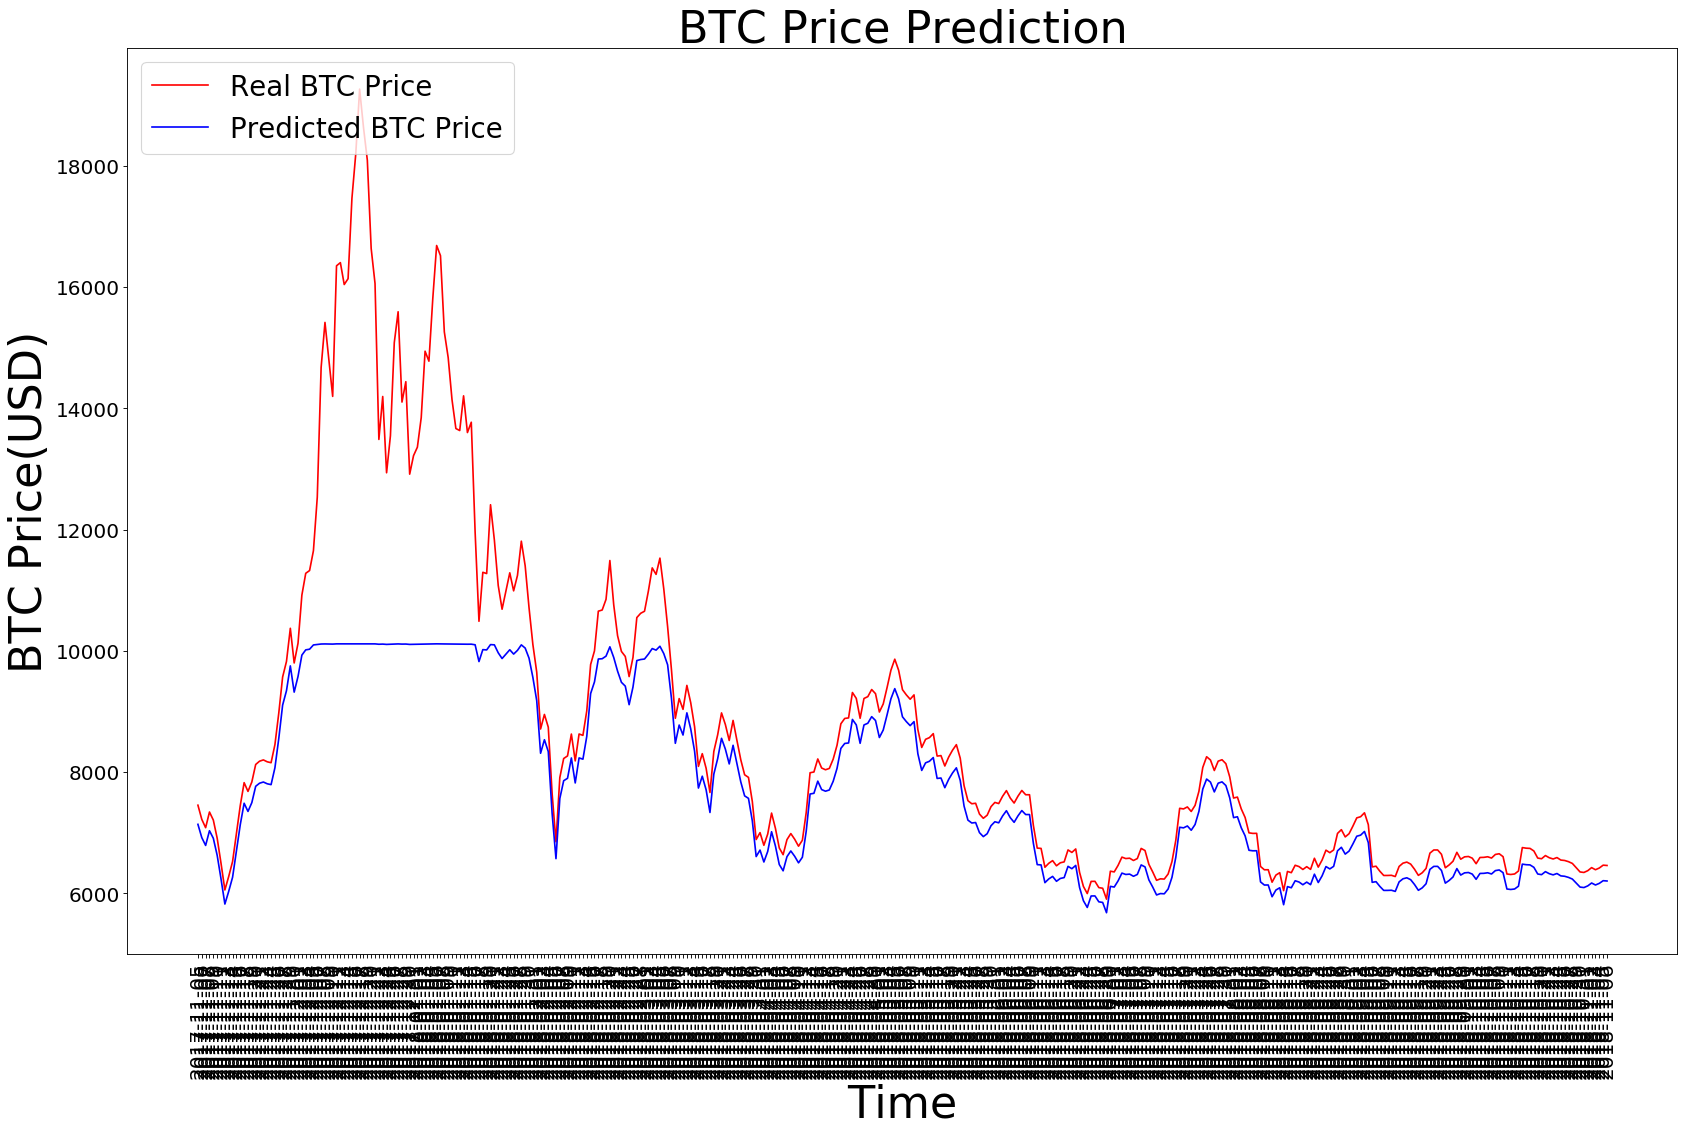

In [44]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['Date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()